<a href="https://colab.research.google.com/github/Zypher44/100DaysOfCode/blob/main/WaterMarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import numpy as np
import requests
from PIL import Image
from skimage import io

InvalidSchema: ignored

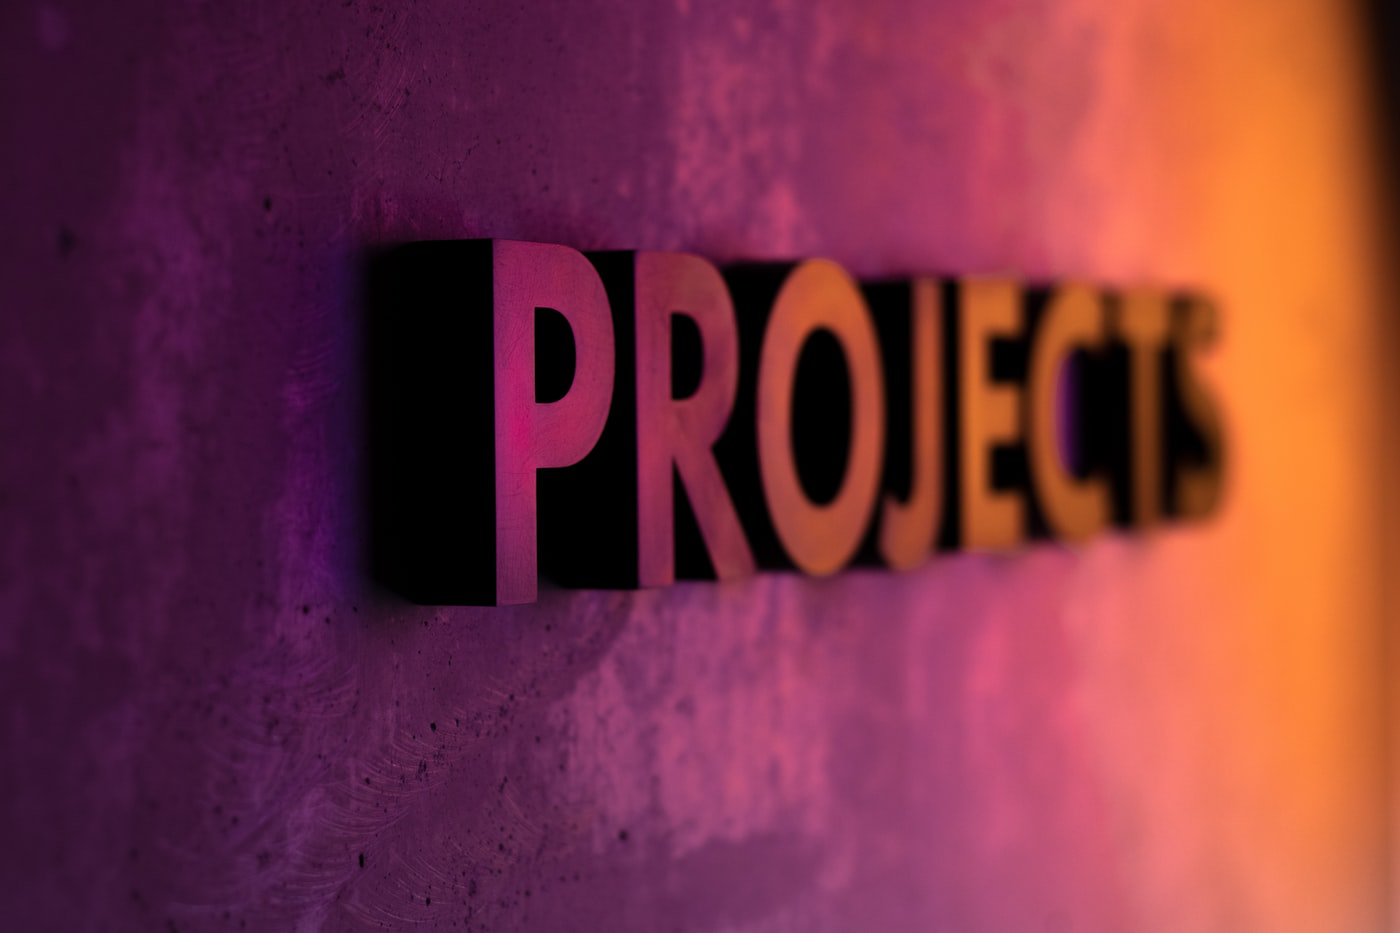

In [18]:
image = Image.open('/content/Testss.jpg')
image

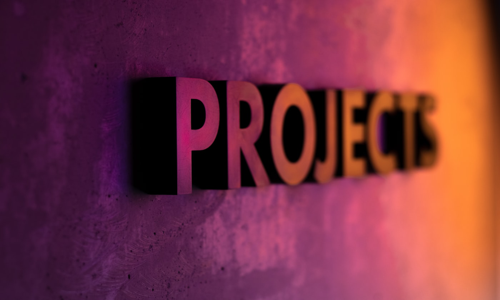

In [20]:
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

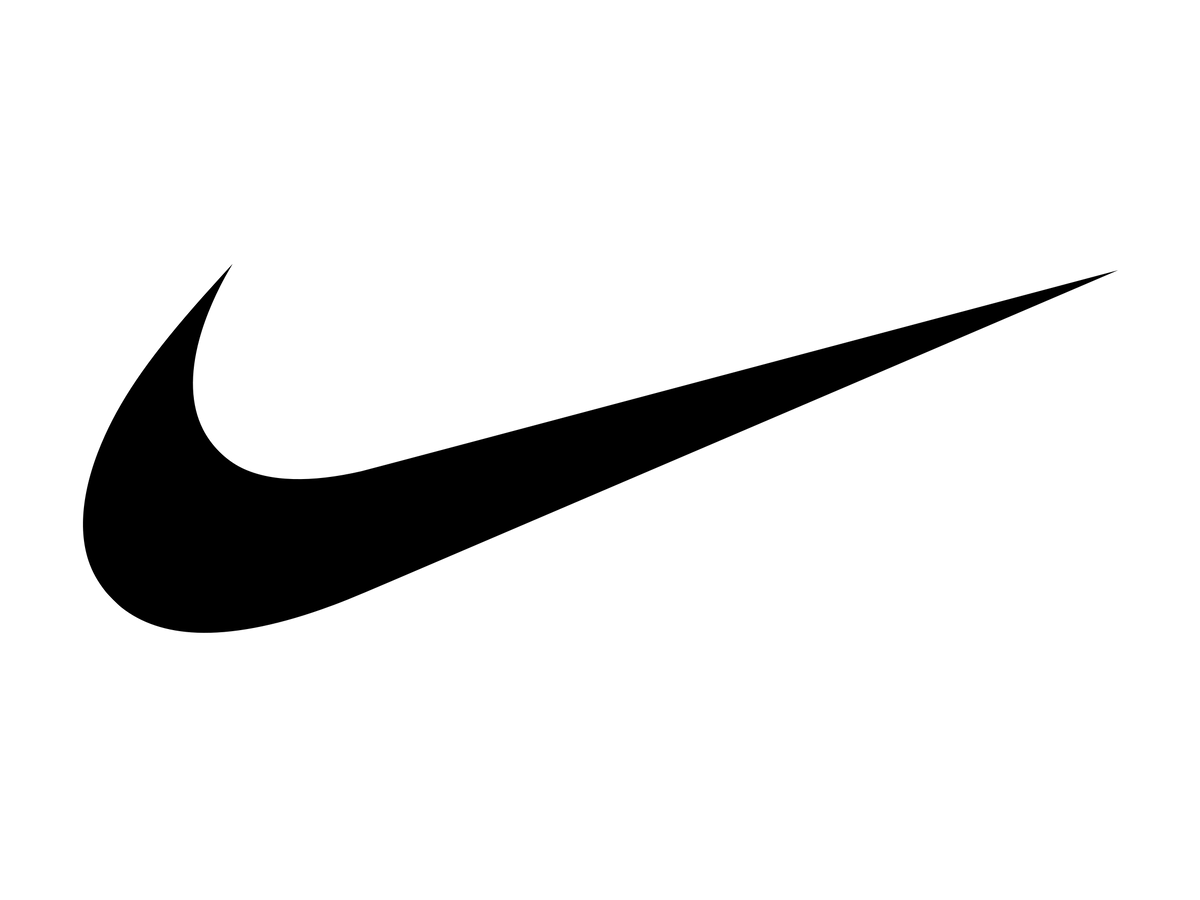

In [22]:
logo = Image.open('/content/Nike-logo.png')
logo


In [27]:
logo = logo.resize((100,100))

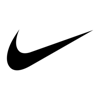

In [28]:
logo

In [29]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape


#In order to use these images we will first convert them into RGB format and store them as numpy array, similararly we will aslo extract the shape

In [36]:
center_y = int(h_image /2)
center_x = int(w_image/2)
top_y = center_y  - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo


In [37]:
#Roi = region of interest 

roi = image_logow[top_y: bottom_y, left_x: right_x]
# add logo to the ROI
result = cv2.addWeighted(roi, 1, logo, 1, 0)

#Drawing 
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0,0,225),1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0,0,255),1)
#Replace the ROI on image 
image_logow[top_y:bottom_y, left_x:right_x] = result

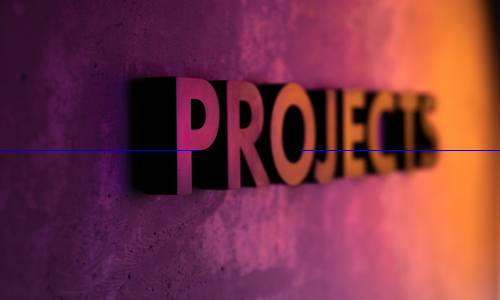

In [38]:
img = Image.fromarray(image_logow,'RGB')
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Convert image from array to RGB to visualize it 

In [41]:
image_text = np.array(image_textw.convert("RGB"))
cv2.putText(image_text, text='Nike', org=(w_image-95, h_image -10), fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=0.5,
            color=(0,0,255),thickness=2, lineType= cv2.LINE_4);


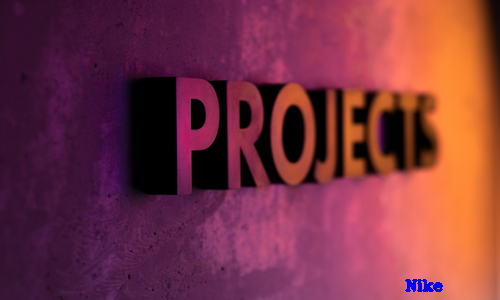

In [42]:
timg = Image.fromarray(image_text,'RGB')
timg